# Emissions Prediction

In [1]:
import xlwings as xw
import pandas as pd
import numpy as np
import string
from tqdm import tqdm
import time
import sys
import os
import matplotlib.pyplot as plt

from scipy.stats.mstats import winsorize
import seaborn as sns

In [2]:
from sklearn.metrics import get_scorer_names
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.neural_network import MLPRegressor

In [3]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

In [4]:
def cross_validation(x, y, n = 7, model = RandomForestRegressor()):
    sample = len(x)//n
    
    mean_importances = np.zeros(shape = x.shape[1])
    mses = []
    all_preds = np.zeros(shape = len(y))
    all_indexes = np.arange(len(x))

    for i in tqdm(range(n)):
        test_indexes = np.random.choice(all_indexes, size = sample, replace = False)
        train_indexes = [j for j in range(len(y)) if j not in test_indexes]
        train_x = x[train_indexes]
        test_x = x[test_indexes]

        train_y = y[train_indexes]
        test_y = y[test_indexes]

        model.fit(train_x, train_y)
        try:
            mean_importances += model.feature_importances_
        except:
            pass
        preds = model.predict(test_x)
        all_preds[len(test_x)*i:len(test_x)*(i+1)] = preds
        
        mse = mean_squared_error(test_y, preds)
        mses.append(mse)
                
        all_indexes = list(all_indexes)
        for index in test_indexes:
            all_indexes.remove(index)
        all_indexes = np.array(all_indexes)
        
    return np.array(mses), mean_importances/n

In [5]:
opgee = pd.read_csv('OPGEE_Training_Data.csv').drop('Unnamed: 0', axis = 1)

In [6]:
#All Regressors - Random Forest

x = opgee.loc[:, ['field_age', 'field_depth', 'production', 'api', 'h2s', 'united_kingdom']]
x = np.array(x).reshape(-1, 6)
y = opgee['Winsorized Emission']

mses_1, importances_1 = cross_validation(x,y)
print(f'Mean MSE: {mses_1.mean()}')
print(f'Std MSE: {mses_1.std()}')

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:51<00:00,  7.38s/it]

Mean MSE: 0.0020071410330203543
Std MSE: 0.0003918287287546191


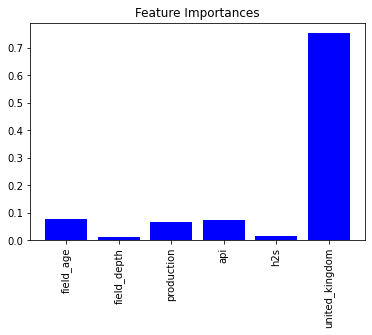

In [7]:
plt.bar(['field_age', 'field_depth', 'production', 'api', 'h2s', 'united_kingdom'], importances_1, color = 'blue')
plt.xticks(rotation = 90)
plt.title('Feature Importances')
plt.show()